# **Tutorial**: Using the simulators `lt.ModelF1`, `lt.ModelF2` and `lt.ModelF3`

[<<< Back to the simulator index](https://github.com/juangamella/causal-chamber-package/tree/main/causalchamber/simulators)

Other links:
- [Derivation of the simulators](https://arxiv.org/pdf/2404.11341#page=32&zoom=100,57,670)
- [Simulators source code](https://github.com/juangamella/causal-chamber-package/blob/main/causalchamber/simulators/lt/image/models_f.py)


If you use the simulators in your work, please consider citing:

```
﻿@article{gamella2025chamber,
  author={Gamella, Juan L. and Peters, Jonas and B{\"u}hlmann, Peter},
  title={Causal chambers as a real-world physical testbed for {AI} methodology},
  journal={Nature Machine Intelligence},
  doi={10.1038/s42256-024-00964-x},
  year={2025},
}
```

In [1]:
import sys
sys.path = ['../../..'] + sys.path

# %load_ext autoreload
# %autoreload 2

## Dependencies

Besides the `causalchamber` package, the notebook also uses `matplotlib`, `numpy` and `pandas` (specified in `tutorials/requirements.txt`).

In [2]:
import causalchamber
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import gridspec


Fetching list of available datasets from https://causalchamber.s3.eu-central-1.amazonaws.com/downloadables/directory.yaml ... done.
If you use our datasets or simulators for your work please consider citing:

﻿@article{gamella2025chamber,
  author={Gamella, Juan L. and Peters, Jonas and B{"u}hlmann, Peter},
  title={Causal chambers as a real-world physical testbed for {AI} methodology},
  journal={Nature Machine Intelligence},
  doi={10.1038/s42256-024-00964-x},
  year={2025},
}



## Initializing the simulators

We take the simulator parameters from calibration experiments and the technical specifications of the camera and polarizers. See [this](https://github.com/juangamella/causal-chamber-paper/blob/main/case_studies/mechanistic_models.ipynb) notebook for the complete process.

In [3]:
# All parameters
S = np.array(
    [
        [0.2995802, 0.06920322, 0.028159],
        [0.04017132, 0.9209918, 0.31265],
        [0.00217392, 0.2071558, 0.75763],
    ]
)
w_r = 2.65625
w_g = 1.0
w_b = 1.77344
Tp = np.array([[0.29, 0.35, 0.33]]).T
Tc = np.array([[0.02, 0.08, 0.18]]).T
center_x = 0.5
center_y = 0.5
radius = 0.22
offset = 0
image_size = 500

Initialize simulators

In [4]:
import causalchamber.simulators.lt as lt

In [5]:
# Model F1
sim_f1 = lt.ModelF1(center_x=center_x,
                    center_y=center_y,
                    radius=radius,
                    offset=offset,
                    image_size=image_size)

# Model F2
sim_f2 = lt.ModelF2(S=S,
                    w_r=w_r,
                    w_g=w_g,
                    w_b=w_b,
                    exposure=0.8,
                    center_x=center_x,
                    center_y=center_y,
                    radius=radius,
                    offset=offset,
                    image_size=image_size)

# Model F3
sim_f3 = lt.ModelF3(S=S,
                    w_r=w_r,
                    w_g=w_g,
                    w_b=w_b,
                    Tp=Tp,
                    Tc=Tc,
                    exposure=2.5,
                    center_x=center_x,
                    center_y=center_y,
                    radius=radius,
                    offset=offset,
                    image_size=image_size)

## Running the simulators

To simulate, call the function `.simulate_from_inputs` with a dataframe containing the simulator inputs as columns. There can be additional columns, which the simulator will ignore.

The names of the necessary columns can be obtained as:

In [6]:
sim_f1.inputs_names

['red', 'green', 'blue', 'pol_1', 'pol_2']

### Example 1: Random inputs

For example, let's generate some images from random inputs:

In [7]:
rng = np.random.default_rng(7); N = 5

inputs = pd.DataFrame({'red': rng.uniform(0,255,size=N),
                       'green': rng.uniform(0,255,size=N),
                       'blue': rng.uniform(0,255,size=N),
                       'pol_1': rng.uniform(-180,180,size=N),
                       'pol_2': rng.uniform(-180,180,size=N)})

outputs_f1 = sim_f1.simulate_from_inputs(inputs)
outputs_f2 = sim_f2.simulate_from_inputs(inputs)
outputs_f3 = sim_f3.simulate_from_inputs(inputs)

Plot the results

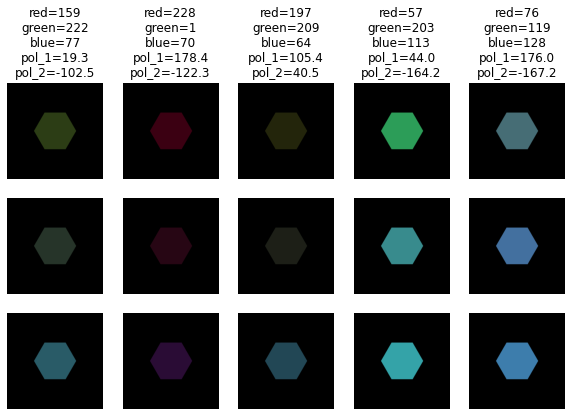

In [8]:
plt.figure(figsize=(N*2,6))
for i,(output_f1, output_f2, output_f3) in enumerate(zip(outputs_f1, outputs_f2, outputs_f3)):
    plt.subplot(3,N,i+1)
    plt.imshow(output_f1)
    plt.title('red=%d\ngreen=%d\nblue=%d\npol_1=%0.1f\npol_2=%0.1f' % tuple(inputs.iloc[i][sim_f1.inputs_names]))
    plt.axis("off")
    plt.subplot(3,N,i+1+N)
    plt.imshow(output_f2)
    plt.axis("off")
    plt.subplot(3,N,i+1+2*N)
    plt.imshow(output_f3)
    plt.axis("off")

### Example 2: Compare to real images

We download a dataset of real images using the functionality provided in the `causalchamber` package. The downloaded dataset is stored in the path given by `root=` below.

For our experiment we will use the `lt_camera_test_v1` dataset, which is described [here](https://github.com/juangamella/causal-chamber/tree/main/datasets/lt_camera_test_v1).

In [9]:
# Download the dataset
dataset = causalchamber.datasets.Dataset('lt_camera_test_v1', root='./', download=True)

# To highlight the difference between simulators, we select some specific images from the experiments "palette" and "polarizer_effects_bright"
images_palette = dataset.get_experiment("palette").as_image_array('500')[0:15]
images_polarizers = dataset.get_experiment("polarizer_effect_bright").as_image_array('500')
df_palette = dataset.get_experiment("palette").as_pandas_dataframe().iloc[0:15]
df_polarizers = dataset.get_experiment("polarizer_effect_bright").as_pandas_dataframe()

# Final images / observations
idx = [11,12,-1] 
images = np.concatenate([images_palette, images_polarizers], axis=0)[idx]
observations = pd.concat([df_palette, df_polarizers], ignore_index=True).iloc[idx]

Dataset lt_camera_test_v1 found in "lt_camera_test_v1".


We can directly use the `observations` dataframe as input to the simulators, since it contains the necessary columns. The additional columns are ignored by the simulator.

In [10]:
outputs_f1 = sim_f1.simulate_from_inputs(observations)
outputs_f2 = sim_f2.simulate_from_inputs(observations)
outputs_f3 = sim_f3.simulate_from_inputs(observations)

Plot the results

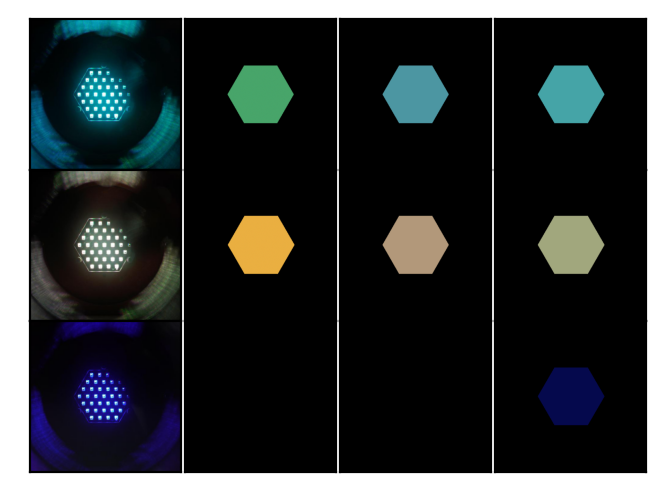

In [11]:
plt.figure(figsize=(4,len(images)*1), dpi=200)
gs = gridspec.GridSpec(len(images), 4, wspace=0, hspace=0)#, height_ratios = [.22, .26, .26, .26])

for i,(real_image,output_f1,output_f2,output_f3) in enumerate(zip(images, outputs_f1, outputs_f2, outputs_f3)):
    
    plt.subplot(gs[i,0])
    ax = plt.gca()
    plt.imshow(real_image)
    plt.yticks([])
    plt.xticks([])
    
    plt.subplot(gs[i,1])
    ax = plt.gca()
    plt.imshow(output_f1)
    plt.yticks([])
    plt.xticks([])
    
    plt.subplot(gs[i,2])
    ax = plt.gca()
    plt.imshow(output_f2)
    plt.yticks([])
    plt.xticks([])
    
    plt.subplot(gs[i,3])
    ax = plt.gca()
    plt.imshow(output_f3)
    plt.yticks([])
    plt.xticks([])